Caregando base de dados usado para analize e resposta das quetões

In [3]:
import pandas as pd
db = pd.read_csv('base_dados.csv', encoding="cp1252")

# Questao 2 #
Quais são os tipos de dados dos atributos (cf slides da aula sobre dados) disponíveis na base?

# Questao 3 #

Quais são as cidades das escolas dos inscritos com dados disponíveis na base? 

R:Atravez da coluna "NO_MUNICIPIO_ESC" obetmos os nomes dos municipios das escolas, assim para obermos isso pegamos os valores unicos desta coluna

In [12]:
db["NO_MUNICIPIO_ESC"].unique()

array([nan, 'Salvador', 'Una', 'Lauro de Freitas', 'Candeias',
       'Mata de São João', 'Jaboatão dos Guararapes', 'Juazeiro',
       'Eunápolis', 'Simões Filho', 'Madre de Deus', 'Apuarema',
       'Vera Cruz', 'Planalto', 'Serrinha', 'Camamu', 'Itaberaba',
       'Rio Verde', 'Remanso', 'Camaçari', 'Amargosa', 'Jequié',
       'Porto Seguro', 'São Sebastião do Passé', 'Caém', 'Ibicoara',
       'Cafarnaum', 'Pojuca', 'América Dourada', 'João Pessoa',
       'Jaguaquara', 'Santa Inês', 'Barreiras', 'Itaparica', 'Rio Real',
       'Feira de Santana', 'São Francisco do Conde', 'Serra Dourada',
       'Presidente Tancredo Neves', 'Salinas da Margarida',
       'Vitória da Conquista', 'Bom Jesus da Lapa', 'São Paulo',
       'Palmas de Monte Alto', 'Teolândia', 'Ubaíra', 'Jaguarari',
       'Castanhal', 'Chã de Alegria', 'Paragominas', 'Duque de Caxias',
       'Tapiramutá', 'Itambé', 'Santa Bárbara', 'Santo Antônio de Jesus',
       'Curitiba', 'Cotia', 'Jandaíra', 'Ouricuri', 'Rio de 

Quais são as cidades de aplicação de provas com dados disponíveis na base? 

Como a filtragem foi feita encima deste atributo sabesmos que tal cidade é Salvador, para confirma pegamos os valores unicos ta coluna "NO_MUNICIPIO_PROVA"

In [13]:
db["NO_MUNICIPIO_PROVA"].unique()

array(['Salvador'], dtype=object)

Quantos candidatos há nas cidades das escolas e nas cidades de aplicação? Compare e discuta os resultados.

Para saber a quantidade de alunos por cidade pedimos um agrupamento da coluna "NO_MUNICIPIO_ESC" e fazemos a contagem de quantos balores temos. Para essa contagem foi usado o methodo count, e mostrado os valores da 1 coluna ( que neste caso guarda o index inicial do candidato nos microdados, assim sendo uma coluna que se tem certeza que não havera valores nulos para atrapalhar a contagem )

Pode ser observado que existem 4 vezes mais candidados que não informaram do que que informaram.

In [44]:
print("Candidados por Cidade das escolas: ",dict(db.groupby("NO_MUNICIPIO_ESC").count().iloc[:,1]))
print("Quantidade de Candidados que temos informação da cidade da escola:",sum(list(db.groupby("NO_MUNICIPIO_ESC").count().iloc[:,1])))
print("Quantidade de Candidatos que não temos informação da cidade da escola:",len(db[db.get("NO_MUNICIPIO_ESC").isna()]))
print("A quantidade de valores dos Candidatos que informaram e não informaram é a mesma quantidade de valores do dataframe original? ",db.iloc[:,1].count() == sum(list(db.groupby("NO_MUNICIPIO_ESC").count().iloc[:,1]))+len(db[db.get("NO_MUNICIPIO_ESC").isna()]))

Candidados por Cidade das escolas:  {'Amargosa': 1, 'América Dourada': 1, 'Apuarema': 1, 'Aracaju': 1, 'Barbacena': 1, 'Barreiras': 2, 'Bom Jesus da Lapa': 1, 'Cafarnaum': 2, 'Camamu': 1, 'Camaçari': 22, 'Candeias': 2, 'Castanhal': 1, 'Caém': 1, 'Chã de Alegria': 1, 'Cotia': 1, 'Curitiba': 2, 'Cícero Dantas': 1, "Dias d'Ávila": 1, 'Duque de Caxias': 3, 'Entre Rios': 1, 'Eunápolis': 3, 'Feira de Santana': 3, 'Fortaleza': 1, 'Ibicoara': 1, 'Iramaia': 1, 'Itaberaba': 2, 'Itambé': 1, 'Itaparica': 2, 'Jaboatão dos Guararapes': 1, 'Jaguaquara': 1, 'Jaguarari': 1, 'Jandaíra': 1, 'Jequié': 2, 'Jeremoabo': 1, 'João Pessoa': 4, 'Juazeiro': 3, 'Lauro de Freitas': 72, 'Luís Eduardo Magalhães': 2, 'Madre de Deus': 8, 'Maricá': 1, 'Marituba': 1, 'Mata de São João': 11, 'Natal': 1, 'Ouricuri': 1, 'Palmas de Monte Alto': 1, 'Paragominas': 7, 'Paulo Afonso': 1, 'Planalto': 1, 'Pojuca': 1, 'Porto Seguro': 2, 'Poções': 1, 'Presidente Tancredo Neves': 1, 'Remanso': 1, 'Rio Real': 1, 'Rio Verde': 1, 'Rio d

Como o criterio escolhido foi a cidade de aplicação então sabemos que todos os candidatos realizaram em Salvador

In [45]:
print("Candidados por Cidade de aplicação: ",dict(db.groupby("NO_MUNICIPIO_PROVA").count().iloc[:,1]))
print("Quantidade de Candidados que temos informação da cidade de aplicação:",sum(list(db.groupby("NO_MUNICIPIO_PROVA").count().iloc[:,1])))
print("Quantidade de Candidatos que não temos informação da cidade de aplicação:",len(db[db.get("NO_MUNICIPIO_PROVA").isna()]))

Candidados por Cidade de aplicação:  {'Salvador': 54604}
Quantidade de Candidados que temos informação da cidade de aplicação: 54604
Quantidade de Candidatos que não temos informação da cidade de aplicação: 0


# Questao 4 #
Escolha duas cidades das escolas. Para cada cidade, calcule a tendência central (média, mediana e/ou moda, conforme possibilidade) e desvio padrão de nota de redação para os inscritos. Que análise pode ser feita observando os valores obtidos?

Para escolher a escola filtramos as cidades e notas da redação, removemos as que tem valor vazio ( tando de cidade quanto de nota ) e vemos quantos valor temos por cidade. Assim escolhemos Salvador e Lauro de Freitas que são as 2 cidades com maior numero de candidados.

In [74]:
db.get(['NO_MUNICIPIO_ESC','NU_NOTA_REDACAO']).dropna().NO_MUNICIPIO_ESC.value_counts()[:5]

NO_MUNICIPIO_ESC
Salvador            8131
Lauro de Freitas      48
Simões Filho          33
Camaçari              16
Mata de São João       7
Name: count, dtype: int64

In [6]:
nota_redação_salvador = db[db["NO_MUNICIPIO_ESC"] == "Salvador"].get(["NU_NOTA_REDACAO"])
nota_redação_lauro = db[db["NO_MUNICIPIO_ESC"] == "Lauro de Freitas"].get(["NU_NOTA_REDACAO"])
display(nota_redação_salvador.describe(),
        nota_redação_lauro.describe())
print(f'moda salvador: {nota_redação_salvador.value_counts().index[0]}',
      f'moda lauro de freitas: {nota_redação_lauro.value_counts().index[0]}', sep = '\n')

,NU_NOTA_REDACAO
count,8131.000000
mean,666.525643
std,205.890067
min,0.000000
25%,560.000000
50%,700.000000
75%,820.000000
max,980.000000


,NU_NOTA_REDACAO
count,48.000000
mean,710.833333
std,214.494292
min,0.000000
25%,665.000000
50%,770.000000
75%,860.000000
max,940.000000


moda salvador: (880.0,)
moda lauro de freitas: (820.0,)


In [26]:
cv_salvador = (nota_redação_lauro.std()/nota_redação_lauro.mean()).iloc[0]
cv_lauro = (nota_redação_lauro.std()/nota_redação_lauro.mean()).iloc[0]
print(f'Coeficiente de variação:\nSalvador:{cv_salvador*100:.05}\nLauro de Freitas:{cv_lauro*100:.05}')

Coeficiente de variação:
Salvador:30.175
Lauro de Freitas:30.175


array([[<Axes: title={'center': 'NU_NOTA_REDACAO'}>]], dtype=object)

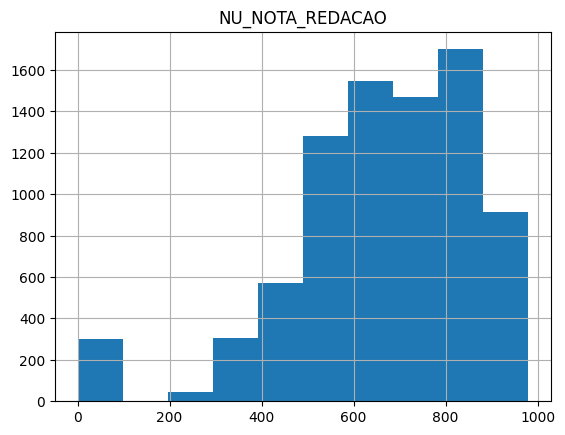

In [34]:
nota_redação_salvador.hist(bins=10)

array([[<Axes: title={'center': 'NU_NOTA_REDACAO'}>]], dtype=object)

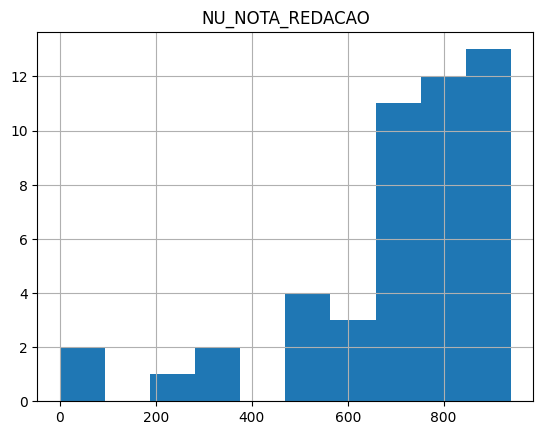

In [33]:
nota_redação_lauro.hist(bins=10)

Percebemos que apesar de todos os quartils e media da nota da redação dos canditos que estudaram em Lauro de Freitas ser maior que os de Salvador tanto a moda quando a nota maxima são maiores em salvador 

Ambas são distribuições assimetricas positivas ou a direita, uma vez que a moda é maior que a mediana ( 50% ou 2 quartil ), que por sua vez é maior que a media

E apesar da media e desvio padrao ser diferentes ambos possuem o mesmo coeficiente de variação

# Questao 5 #
Escolha uma cidade de escola, faça histogramas sobrepostos da nota de redação dos inscritos por sexo biológico. Faça o mesmo para nota de matemática. O que você observa? Comente.


In [19]:
db.columns
plt = db.plot
for b in ['NU_NOTA_REDACAO','NU_NOTA_MT']:
    for a in db.TP_SEXO.unique():
        print(f'Histograma para sexo {a}') # nao conseguir setar o titulo
        db_temp = db[db['TP_SEXO'] == a].get(b)
        print(db_temp.values)
        plt.hist(list(db_temp.dropna().values), bins=100)
plt.show()

Histograma para sexo M
[ nan  nan  nan ...  nan 760. 600.]


KeyError: 620.0

texto explicativo

# Questao 6 #
Crie um atributo de idade a partir do atributo de faixa etária (adote um critério para selecionar um valor de idade para cada faixa etária). 

Escolha uma cidade de escola, identifique as 10 faixas de renda familiar com maior número de inscritos. Escolha duas faixas de renda dentre estas. Para cada faixa de renda, determine para o atributo  idade, a mediana (Q2), assim como os quartis de 25% e 75% (Q1 e Q3), além de valores mínimo e máximo. O que você observa? Comente.


In [30]:
db_idade = db.copy()
idades = [None,16,17,18,19,20,21,22,23,24,25,28,33,38,43,48,53,58,63,68,71]
func = lambda idade_v : [idades[idade] for idade in idade_v]
db_idade['idade'] = func(db["TP_FAIXA_ETARIA"] )
faixas_renda = db_idade[db_idade['NO_MUNICIPIO_ESC'] == "Salvador"].get(['Q006']).value_counts()[:10]
faixas_renda

Q006
B       2658
C       1556
D       1058
E        637
G        560
H        551
A        439
F        392
Q        348
I        219
Name: count, dtype: int64

In [43]:
for renda in faixas_renda.index[:2]:
    display(db_idade[db_idade['Q006'] == renda[0]].get('idade').describe())

count    18189.000000
mean        23.254110
std          8.105058
min         16.000000
25%         18.000000
50%         20.000000
75%         25.000000
max         71.000000
Name: idade, dtype: float64

count    9635.000000
mean       23.365023
std         8.542164
min        16.000000
25%        18.000000
50%        20.000000
75%        25.000000
max        71.000000
Name: idade, dtype: float64

Observamos que a idade de ambas as faixas de renda tem idades parecidas

# Questao 7 

Escolha uma cidade (de escola), faça a tabela de contingência de número de inscritos entre o tipo de escola e o atributo raça/cor. O que você observa? Discuta.

In [45]:
db["TP_ESCOLA"]
pd.crosstab(db.TP_ESCOLA,db.TP_COR_RACA)

TP_COR_RACA,0,1,2,3,4,5
TP_ESCOLA,,,,,,
1,750,7492,13854,16872,548,110
2,198,1283,4174,4328,222,41
3,95,1894,889,1797,50,7


observações

# Questao 8
Escolha uma cidade (de escola) e duas provas do ENEM. Filtre somente os candidatos desta cidade, e faça um gráfico de dispersão das notas dos candidatos em uma prova (1º eixo) em relação às notas dos candidatos em outra prova (2º eixo). Observe o gráfico e calcule o coeficiente de correlação de Pearson. 

Repita para mudando a escolha de uma das provas do ENEM (mantenha a outra prova escolhida).


<Axes: xlabel='NU_NOTA_CH', ylabel='NU_NOTA_MT'>

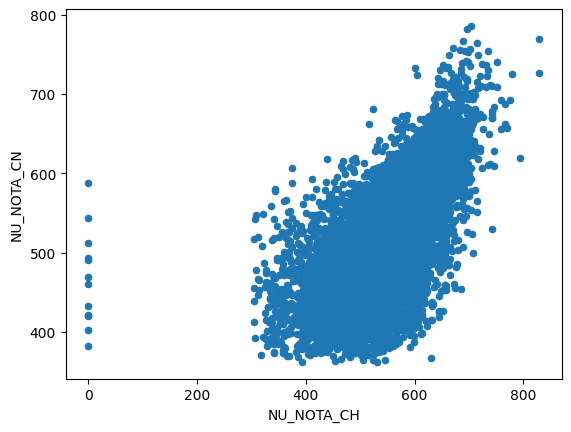

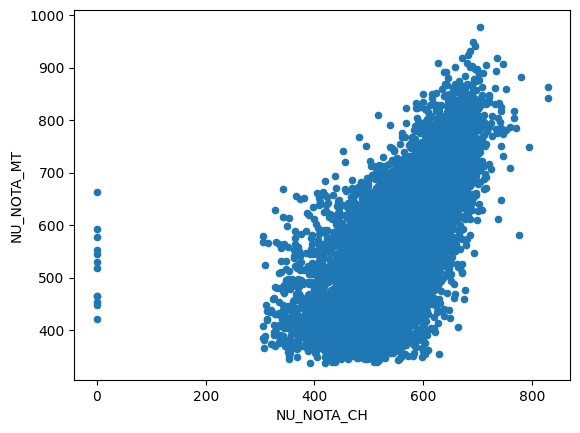

In [51]:
db_notas = db_idade[db_idade['NO_MUNICIPIO_ESC'] == "Salvador"].get(['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT'])
db_notas.plot.scatter(x='NU_NOTA_CH',y='NU_NOTA_CN')
db_notas.corr(method='pearson')
db_notas.plot.scatter(x='NU_NOTA_CH',y='NU_NOTA_MT')

observações

# Questao 9
Faça uma análise da relação entre renda mensal familiar e as notas nas provas do ENEM. Defina e justifique seu método de análise. Discuta os resultados.

In [61]:
db_notas = db.get(['Q006','NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']).groupby('Q006').mean()
db_notas['Total'] = (db_notas['NU_NOTA_CH'] + db_notas['NU_NOTA_CN'] + db_notas['NU_NOTA_LC'] + db_notas['NU_NOTA_MT'] + db_notas['NU_NOTA_REDACAO'])/5
db_notas

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Total
Q006,,,,,,
A,515.525253,469.034323,495.243434,483.303737,478.281793,488.277708
B,563.350899,475.469919,508.632070,502.784826,496.051686,509.257880
C,598.276914,488.086528,523.846722,518.043413,520.755738,529.801863
D,625.392066,498.104110,533.813423,526.615844,535.033897,543.791868
E,654.101276,508.629023,545.878779,537.232857,553.831374,559.934662
F,674.641564,520.119076,556.998262,547.516437,570.322483,573.919565
G,700.062500,527.457774,565.879323,553.538802,588.786743,587.145028
H,723.046218,535.641900,574.616807,562.206092,597.158814,598.533966
I,734.846336,552.191811,580.022459,564.448936,617.401365,609.782181


<Axes: xlabel='Q006'>

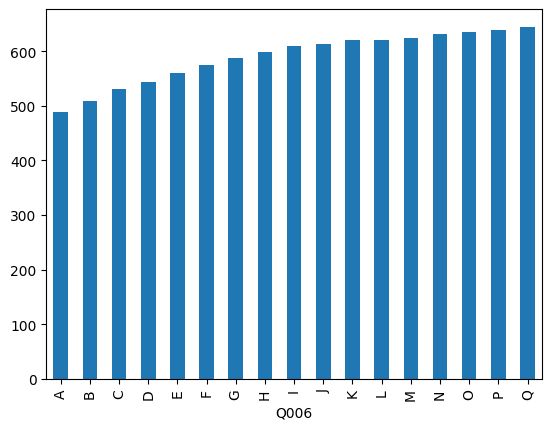

In [67]:

db_notas['Total'].plot.bar()